In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Prac/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Sleep Hours                       10000 non-null  int64
 3   Sample Question Papers Practiced  10000 non-null  int64
 4   Performance Index                 10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
x = data[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]]
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [8]:
y = data['Performance Index']
y.head()

,Performance Index
0,91
1,65
2,45
3,36
4,66


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

m = model.coef_
c = model.intercept_

print(m)
print(c)

mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
R_2 = r2_score(y_test,y_pred)

print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"R_2: {R_2}")

n = x_test.shape[0]
k = x_test.shape[1]

adj_R2 = 1 - ((1-R_2)*(n-1))/(n-k-1)

print(f"Adjusted R_2: {adj_R2}")


[2.85289351 1.01703572 0.47331832 0.19172629]
-33.60206732749288
mse: 4.182254914593815
rmse: 2.045056213064525
R_2: 0.9887144552384186
Adjusted R_2: 0.9886918275797487


In [53]:
model.predict([[10,82,8,30]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87.86213182])

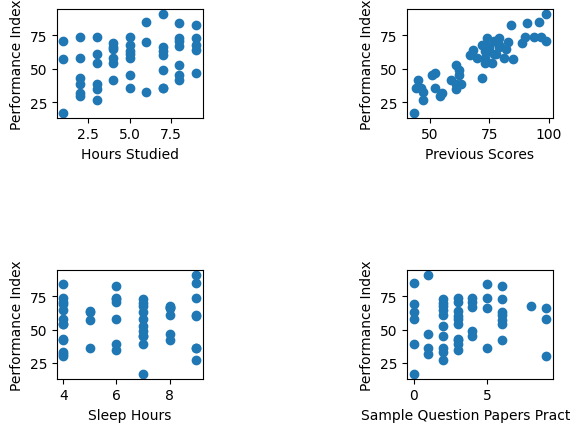

In [35]:
plt.subplot(3,3,1)
plt.scatter(data["Hours Studied"][:50],y[:50])
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")

plt.subplot(3,3,3)
plt.scatter(data["Previous Scores"][:50],y[:50])
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")

plt.subplot(3,3,7)
plt.scatter(data["Sleep Hours"][:50],y[:50])
plt.xlabel("Sleep Hours")
plt.ylabel("Performance Index")

plt.subplot(3,3,9)
plt.scatter(data["Sample Question Papers Practiced"][:50],y[:50])
plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("Performance Index")

plt.show()